In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

<h1>TRAINING DATASET </h1>

<h3>1. Importing Train Dataset</h3>

In [4]:
df_train = pd.read_csv("data\\train.csv")
df_train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,Male,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0
11504794,11504794,Female,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1
11504795,11504795,Female,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0
11504796,11504796,Female,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1


<h3>2. Architecture of Dataset</h3>

In [5]:
df_train.shape

(11504798, 12)

In [6]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


<h3>3. Dropping unecessary columns <h3>

In [10]:
df_train = df_train.drop(columns= ['id'])

In [11]:
df_train.shape

(11504798, 11)

<h3>4. Checking for Duplicates</h3>

In [12]:
print("Number of duplicated rows in dataset : ",df_train.duplicated().sum())

Number of duplicated rows in dataset :  0


<h3>5. Handling Missing Values </h3>

In [14]:
df_train.isna().sum().sort_values(ascending = False)

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<h3>6. Encode Categorical Columns </h3>

In [16]:
df_train.info()
print('\n')
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                object 
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           object 
 6   Vehicle_Damage        object 
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 965.5+ MB




,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [15]:
numerical_df = df_train.select_dtypes(include=['number'])
# numerical_features = numerical_df.columns.tolist()

categorical_df = df_train.select_dtypes(include=['object'])
# categorical_df = categorical_df.columns.to_list()


In [17]:
for col in categorical_df:
    print(f"{col} has {df_train[col].nunique()} values : {df_train[col].unique()} \n")

Gender has 2 values : ['Male' 'Female'] 

Vehicle_Age has 3 values : ['1-2 Year' '> 2 Years' '< 1 Year'] 

Vehicle_Damage has 2 values : ['Yes' 'No'] 



In [18]:
for col in numerical_df:
    print(f"{col} has {df_train[col].nunique()} values : {df_train[col].unique()} \n")

Age has 66 values : [21 43 25 35 36 31 23 47 26 66 22 27 24 79 34 20 42 40 50 67 63 46 37 30
 53 32 28 58 48 59 52 39 44 33 41 57 51 45 68 74 29 49 55 61 60 65 54 38
 56 71 62 70 73 64 69 72 78 80 76 75 77 81 83 82 84 85] 

Driving_License has 2 values : [1 0] 

Region_Code has 54 values : [35.  28.  14.   1.  15.  47.  45.   8.  11.   3.  10.  12.  37.  50.
 30.  46.  29.  16.  26.  25.  41.  48.   7.   4.  24.  36.  33.   2.
  9.  27.  18.  43.  49.  17.  13.  38.   6.  21.  23.   0.  19.   5.
 39.  44.  20.  40.  22.  32.  42.  31.  34.  51.  52.  39.2] 

Previously_Insured has 2 values : [0 1] 

Annual_Premium has 51728 values : [65101. 58911. 38043. ... 22112. 54335. 64538.] 

Policy_Sales_Channel has 152 values : [124.  26. 152. 156. 160.   8.  31. 157.  60. 122.  15.  30. 147.   1.
  63. 136. 154.  18. 135. 151.   3.  10.  55. 108.   7.  29. 163.  13.
 133. 145.  25.  12. 109.  23.  78.   4. 153. 150. 146. 120. 107. 155.
  61.  14.  45.  11.  19.  24.  52. 132. 125.  59.  16.  2

In [19]:
df_train.shape

(11504798, 11)

<h4>EDA Distribution Across All Features</h4>

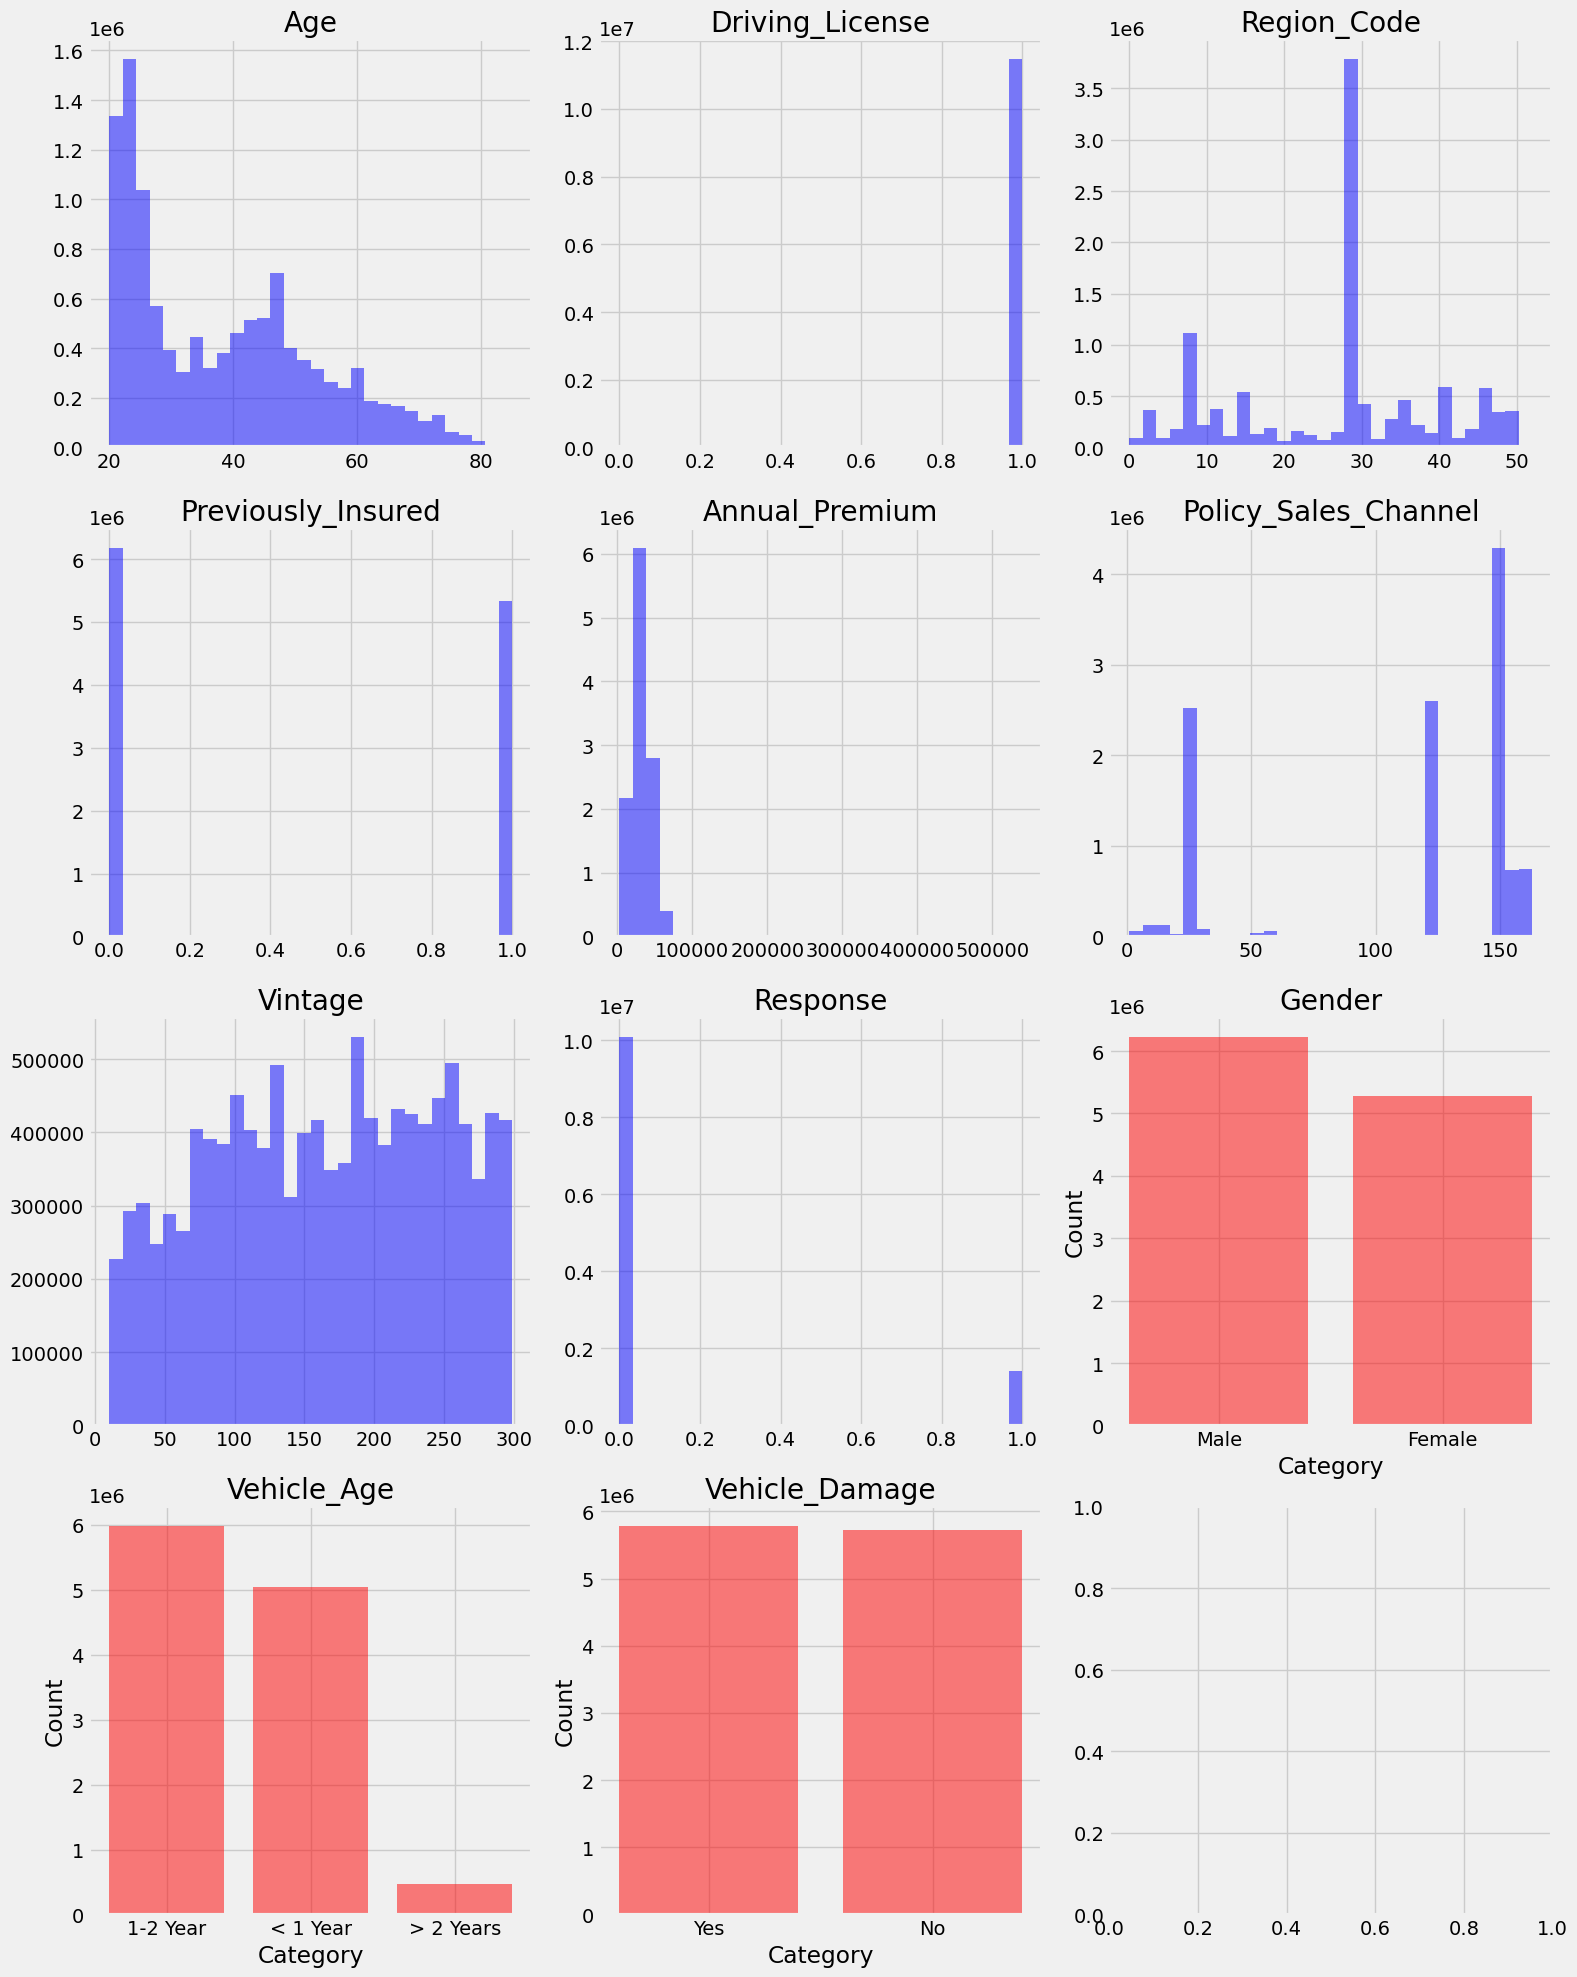

In [21]:
fig, axs = plt.subplots(4, 3, figsize=(16, 20))
axs = axs.flatten()

index = 0

# Loop through each numerical column and plot a histogram
for num_ft in numerical_df.columns:
    ax = axs[index]
    ax.hist(numerical_df[num_ft], bins=30, alpha=0.5, color='blue')
    ax.set_title(num_ft)
    index += 1

# Loop through each categorical column and plot a bar chart of value counts
for cat_ft in categorical_df.columns:
    ax = axs[index]
    # Get the frequency counts for each category
    counts = categorical_df[cat_ft].value_counts()
    # Create a bar chart using the category names as labels
    ax.bar(counts.index.astype(str), counts.values, alpha=0.5, color='red')
    ax.set_title(cat_ft)
    ax.set_xlabel("Category")
    ax.set_ylabel("Count")
    index+=1

plt.tight_layout()
plt.show()

<h4>GENDER </h4>

In [22]:
# Display the unique values before encoding (optional)
print("Before encoding:", df_train['Gender'].unique())

# Apply binary encoding: 'Male' → 1, 'Female' → 0
df_train['Gender'] = df_train['Gender'].map({'Male': 1, 'Female': 0})

# Verify the transformation (optional)
print("After encoding:", df_train['Gender'].unique())


Before encoding: ['Male' 'Female']
After encoding: [1 0]


In [23]:
df_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,0,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,0,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,0,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


<h4>VEHICLE AGE</h4>

In [24]:
# Optional: View unique values before encoding
print("Before encoding:", df_train['Vehicle_Age'].unique())

# Initialize OrdinalEncoder with explicit category order
ord_enc = OrdinalEncoder(categories=[['< 1 Year', '1-2 Year', '> 2 Years']])

# Apply the encoding and overwrite the existing column
df_train['Vehicle_Age'] = ord_enc.fit_transform(df_train[['Vehicle_Age']])

# Optional: Confirm encoding worked
print("After encoding:", df_train['Vehicle_Age'].unique())

Before encoding: ['1-2 Year' '> 2 Years' '< 1 Year']
After encoding: [1. 2. 0.]


In [25]:
df_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,21,1,35.0,0,1.0,Yes,65101.0,124.0,187,0
1,1,43,1,28.0,0,2.0,Yes,58911.0,26.0,288,1
2,0,25,1,14.0,1,0.0,No,38043.0,152.0,254,0
3,0,35,1,1.0,0,1.0,Yes,2630.0,156.0,76,0
4,0,36,1,15.0,1,1.0,No,31951.0,152.0,294,0


<h4>VEHICLE DAMAGE</h4>

In [26]:
# Optional: View unique values before encoding
print("Before encoding:", df_train['Vehicle_Damage'].unique())

# Encode Vehicle_Damage: Yes = 1, No = 0
df_train['Vehicle_Damage'] = df_train['Vehicle_Damage'].map({'Yes': 1, 'No': 0})

# Optional: Check result
print("After encoding:", df_train['Vehicle_Damage'].unique())


Before encoding: ['Yes' 'No']
After encoding: [1 0]


In [27]:
df_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,21,1,35.0,0,1.0,1,65101.0,124.0,187,0
1,1,43,1,28.0,0,2.0,1,58911.0,26.0,288,1
2,0,25,1,14.0,1,0.0,0,38043.0,152.0,254,0
3,0,35,1,1.0,0,1.0,1,2630.0,156.0,76,0
4,0,36,1,15.0,1,1.0,0,31951.0,152.0,294,0


<h4>EDA Distribution Across Categorical Columns</h4>

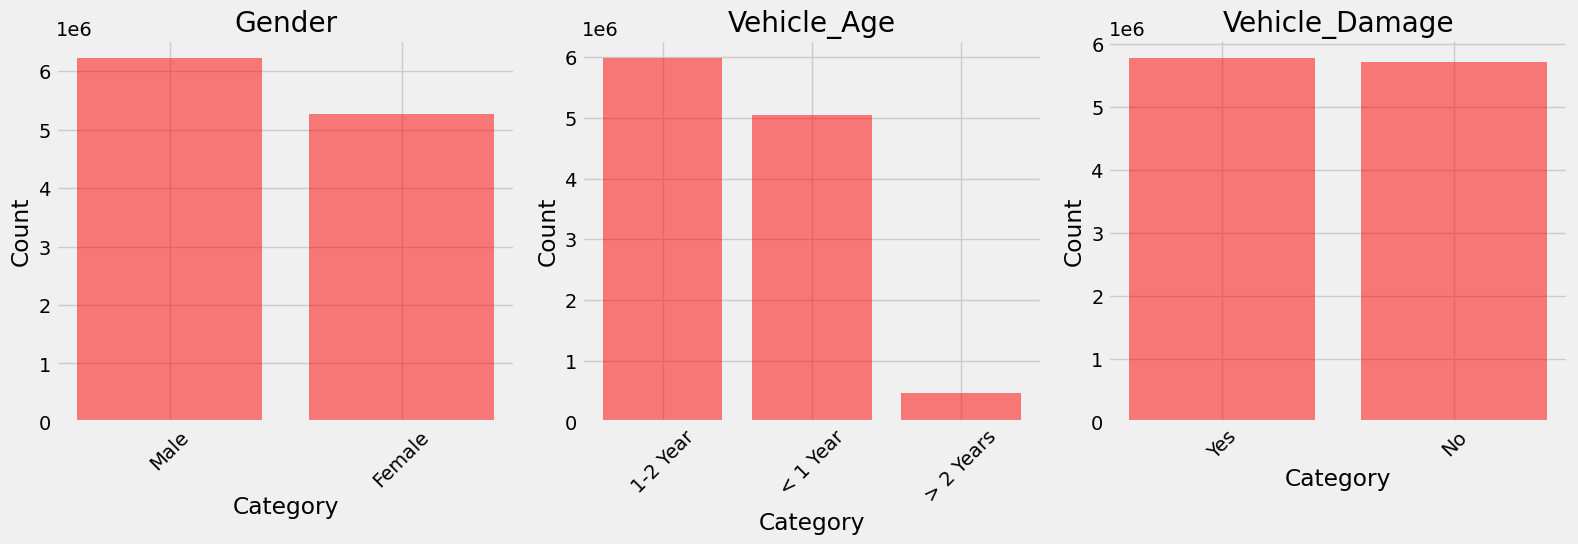

In [29]:
fig, axs = plt.subplots(4, 3, figsize=(16, 20))
axs = axs.flatten()

for idx, col in enumerate(categorical_df.columns):
    counts = categorical_df[col].value_counts()
    ax = axs[idx]
    ax.bar(counts.index.astype(str), counts.values, alpha=0.5, color='red')
    ax.set_title(col)
    ax.set_xlabel("Category")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)

# hide all the remaining axes
for ax in axs[len(categorical_df.columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

<h3>7. EDA Checking Distribution </h3>

In [30]:
df_train.describe()


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.413510e-01,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,6.031073e-01,5.026798e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,4.982872e-01,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,5.678559e-01,4.999928e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,0.000000e+00,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,1.000000e+00,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,1.000000e+00,1.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,1.000000e+00,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.000000e+00,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,2.000000e+00,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


<h3>8. Pearson Correlation </h3>

In [31]:
df_train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,21,1,35.0,0,1.0,1,65101.0,124.0,187,0
1,1,43,1,28.0,0,2.0,1,58911.0,26.0,288,1
2,0,25,1,14.0,1,0.0,0,38043.0,152.0,254,0
3,0,35,1,1.0,0,1.0,1,2630.0,156.0,76,0
4,0,36,1,15.0,1,1.0,0,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...
11504793,1,48,1,6.0,0,1.0,1,27412.0,26.0,218,0
11504794,0,26,1,36.0,0,0.0,1,29509.0,152.0,115,1
11504795,0,29,1,32.0,1,0.0,0,2630.0,152.0,189,0
11504796,0,51,1,28.0,0,1.0,1,48443.0,26.0,274,1


In [32]:
from scipy import stats

c_stats = []
p_values = []
for col1 in df_train.columns:
    for col2 in df_train.columns:
        res = stats.pearsonr(df_train[col1],df_train[col2])
        c_stats.append((col1,col2,res.statistic))
        p_values.append((col1,col2, res.pvalue))
print(f'c stats: {c_stats}')
print(f'p_values: {p_values}')

c stats: [('Gender', 'Gender', 0.999999999994104), ('Gender', 'Age', 0.157662837706448), ('Gender', 'Driving_License', -0.018701530564673996), ('Gender', 'Region_Code', -0.0001056030456589654), ('Gender', 'Previously_Insured', -0.08761408970975207), ('Gender', 'Vehicle_Age', 0.1673536867703539), ('Gender', 'Vehicle_Damage', 0.09698867010477917), ('Gender', 'Annual_Premium', 0.010651681360287577), ('Gender', 'Policy_Sales_Channel', -0.11605819968765003), ('Gender', 'Vintage', -0.009535494907758164), ('Gender', 'Response', 0.05521230387936778), ('Age', 'Gender', 0.157662837706448), ('Age', 'Age', 1.0), ('Age', 'Driving_License', -0.07851888547245316), ('Age', 'Region_Code', 0.03704101003237748), ('Age', 'Previously_Insured', -0.2762481443159648), ('Age', 'Vehicle_Age', 0.7790407876672103), ('Age', 'Vehicle_Damage', 0.2879523186613451), ('Age', 'Annual_Premium', 0.056326585303630355), ('Age', 'Policy_Sales_Channel', -0.5914433427314401), ('Age', 'Vintage', -0.013292931395185666), ('Age', 

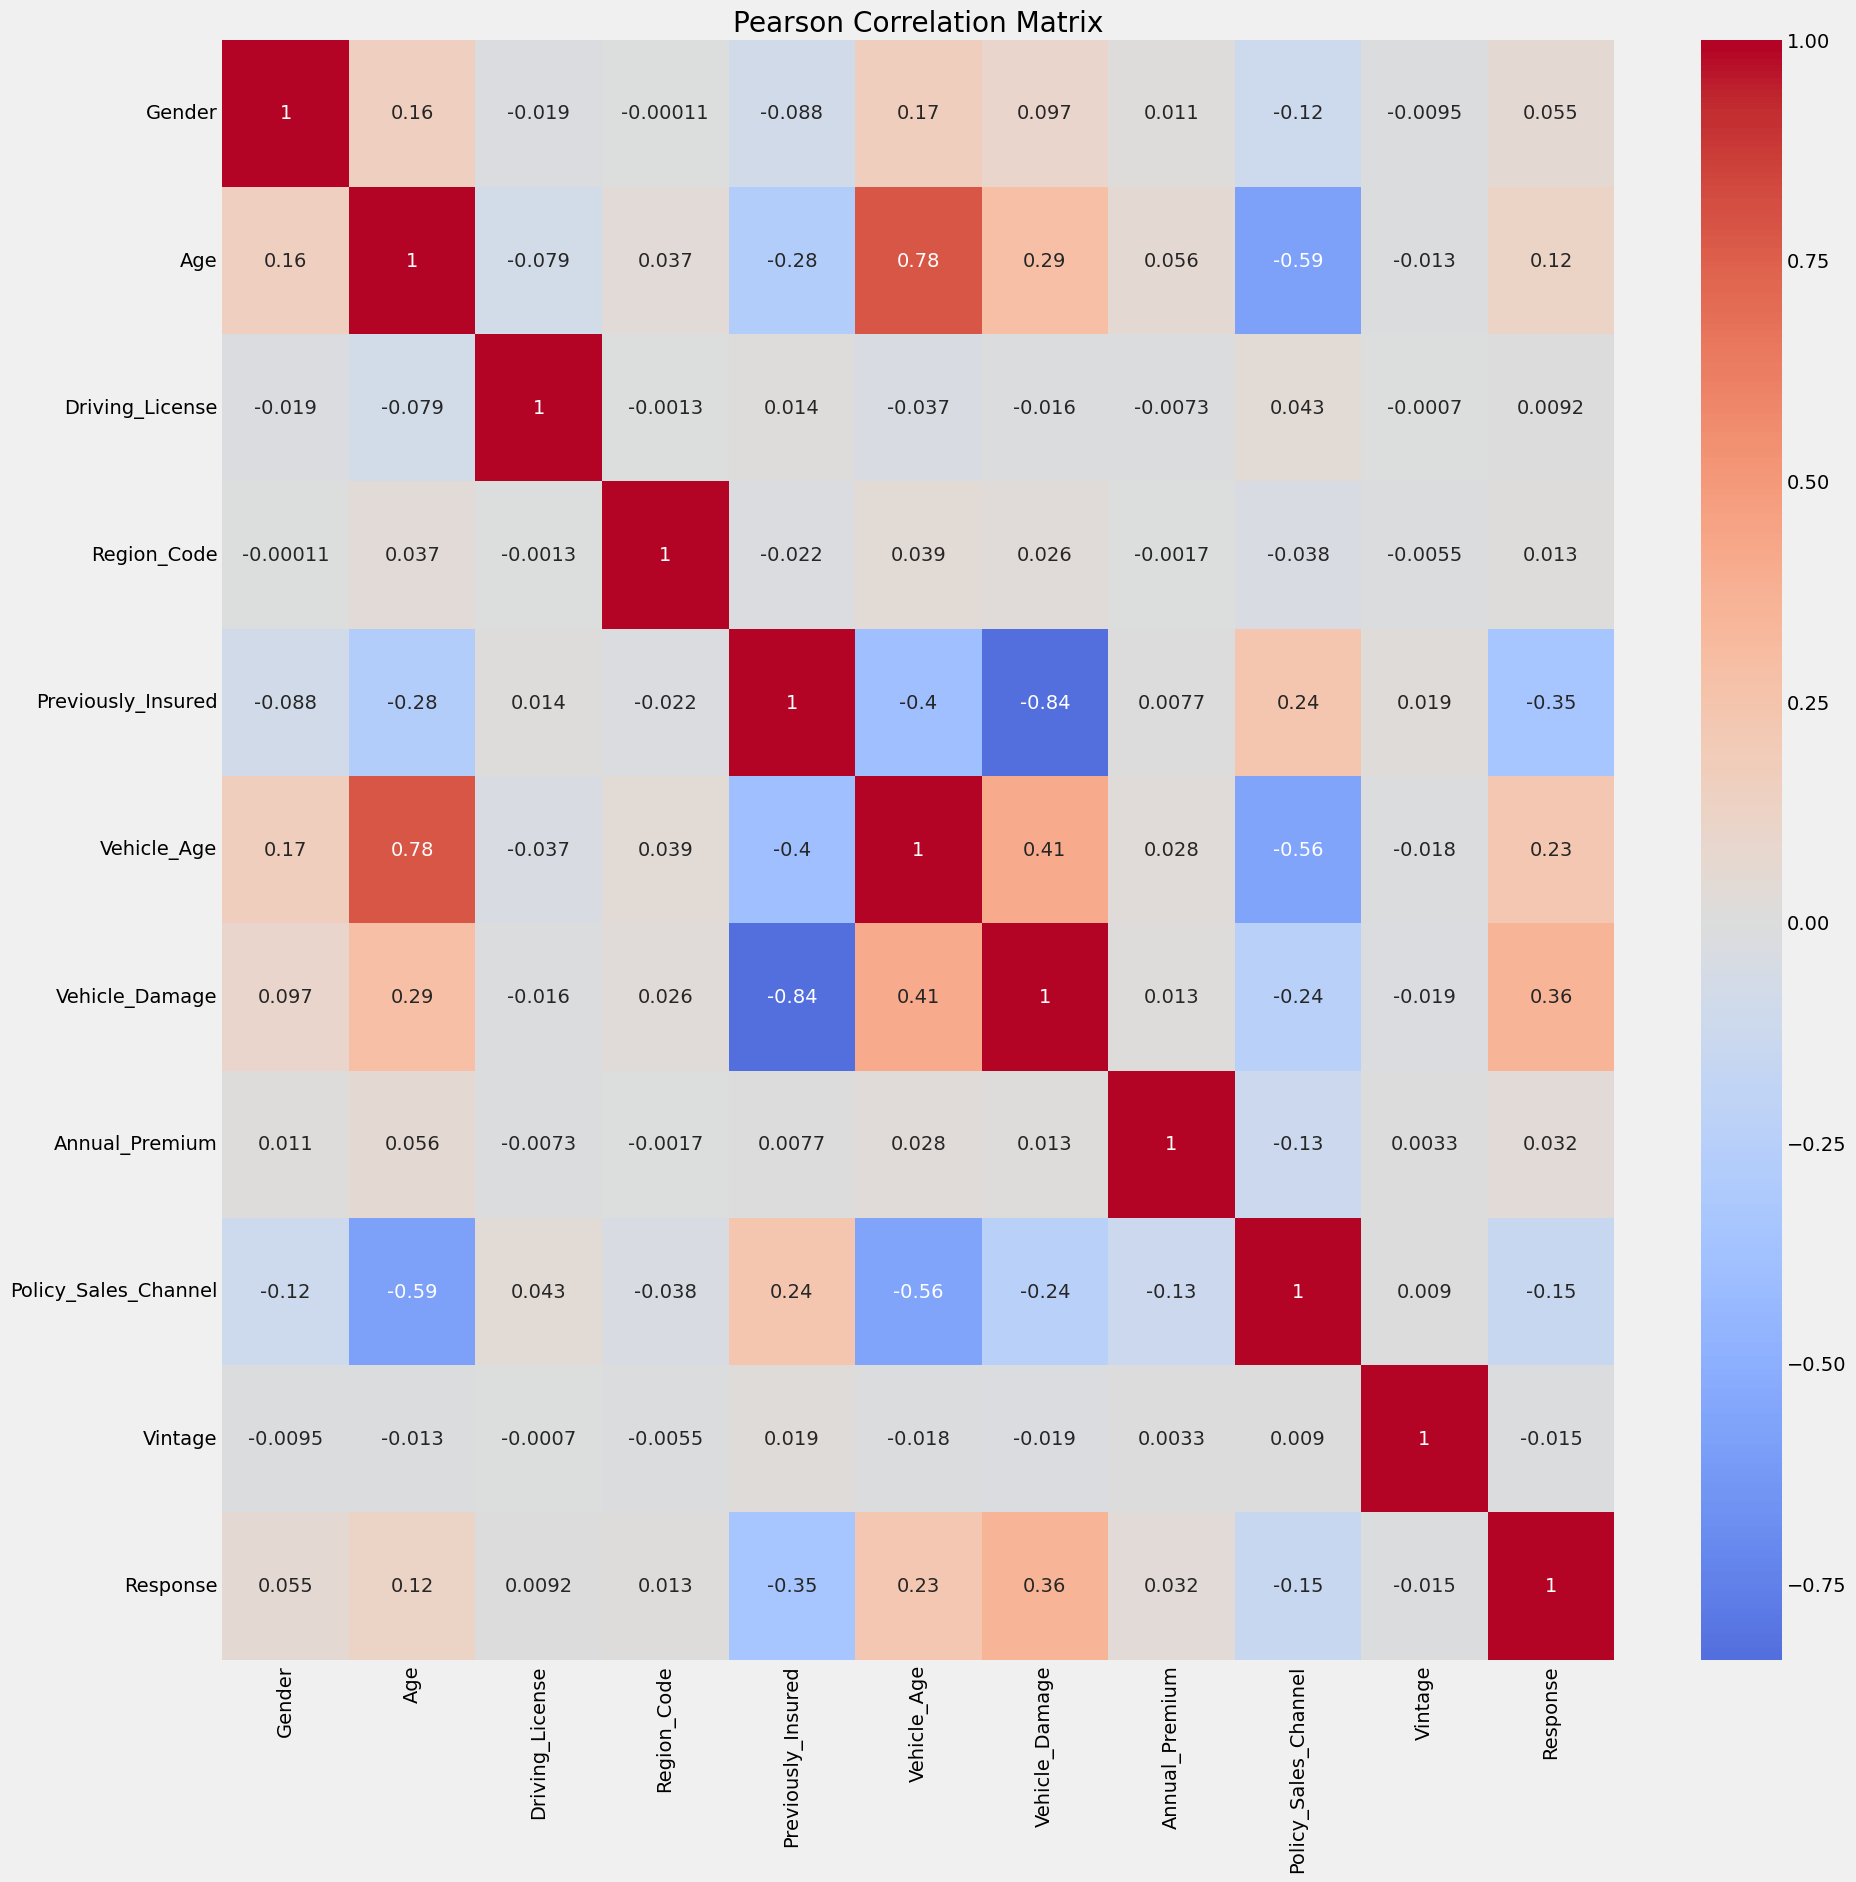

In [33]:
import seaborn as sns

# Calculate the Pearson correlation matrix
corr_matrix = df_train.corr(method='pearson')

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Pearson Correlation Matrix")
plt.show()

<h3>9. Data Preprocessing based on EDA </h3>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Train Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Get importances
importances = pd.Series(model.feature_importances_, index=x_train.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title("Feature Importance from Random Forest")
plt.show()


<h3>10. Scaling the Numerical Columns </h3>

In [34]:
for col in df_train.columns:
    print(f"{col} has {df_train[col].nunique()} values : {df_train[col].unique()} \n")

Gender has 2 values : [1 0] 

Age has 66 values : [21 43 25 35 36 31 23 47 26 66 22 27 24 79 34 20 42 40 50 67 63 46 37 30
 53 32 28 58 48 59 52 39 44 33 41 57 51 45 68 74 29 49 55 61 60 65 54 38
 56 71 62 70 73 64 69 72 78 80 76 75 77 81 83 82 84 85] 

Driving_License has 2 values : [1 0] 

Region_Code has 54 values : [35.  28.  14.   1.  15.  47.  45.   8.  11.   3.  10.  12.  37.  50.
 30.  46.  29.  16.  26.  25.  41.  48.   7.   4.  24.  36.  33.   2.
  9.  27.  18.  43.  49.  17.  13.  38.   6.  21.  23.   0.  19.   5.
 39.  44.  20.  40.  22.  32.  42.  31.  34.  51.  52.  39.2] 

Previously_Insured has 2 values : [0 1] 

Vehicle_Age has 3 values : [1. 2. 0.] 

Vehicle_Damage has 2 values : [1 0] 

Annual_Premium has 51728 values : [65101. 58911. 38043. ... 22112. 54335. 64538.] 

Policy_Sales_Channel has 152 values : [124.  26. 152. 156. 160.   8.  31. 157.  60. 122.  15.  30. 147.   1.
  63. 136. 154.  18. 135. 151.   3.  10.  55. 108.   7.  29. 163.  13.
 133. 145.  25.  12. 

In [35]:
from sklearn.preprocessing import StandardScaler

# Choose continuous columns to scale
scale_cols = ['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

# Initialize scaler
scaler = StandardScaler()

# Apply scaling
df_train[scale_cols] = scaler.fit_transform(df_train[scale_cols])

<h3> 11. Split the data x and y for training </h3>

In [36]:
# Define dependent and independent variables
dep_col = 'Response'  # target variable
ind_col = [col for col in df_train.columns if col != dep_col]  # all features except target

# Split into feature matrix X and target vector y
x_train = df_train[ind_col]
y_train = df_train[dep_col]

In [37]:
print('Train Size : ')
print('X :', x_train.shape , '\ny :' , y_train.shape, '\n\n')

Train Size : 
X : (11504798, 10) 
y : (11504798,) 




In [38]:
df_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,-1.159410,1,35.0,0,1.0,1,2.105145,0.214202,0.288852,0
1,1,0.307897,1,28.0,0,2.0,1,1.728962,-1.599414,1.551675,1
2,0,-0.892627,1,14.0,1,0.0,0,0.460756,0.732378,1.126566,0
3,0,-0.225669,1,1.0,0,1.0,1,-1.691389,0.806403,-1.099003,0
4,0,-0.158974,1,15.0,1,1.0,0,0.090529,0.732378,1.626694,0


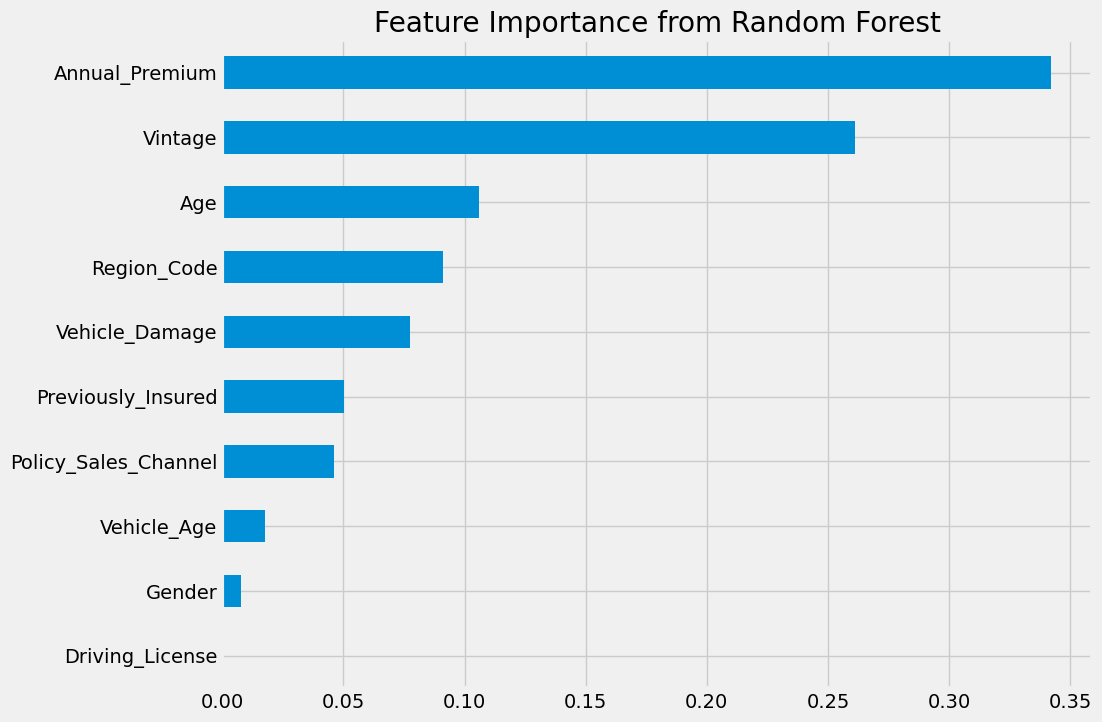

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Train Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Get importances
importances = pd.Series(model.feature_importances_, index=x_train.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title("Feature Importance from Random Forest")
plt.show()
